#  1/ Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA)

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

digits = load_digits()

print(digits.data.shape)

(1797, 64)


In [2]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# load digits to dataframe
df = pd.DataFrame(digits.data, columns=digits.feature_names, index=digits.target)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
index_labels = digits.feature_names

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create StandardScaler
scaler = StandardScaler()
# Fit and transform
scaled_data = scaler.fit_transform(df)
# write a function 
def fit_pca(data, index_labels):
    # Create PCA object
    pca = PCA()
    pca.fit(data)
    # Create dataframe containing pca components
    pca_df = pd.DataFrame(pca.components_,
                          columns=[f"PC{i+1}" for i in range(scaled_data.shape[1])],
                          index=index_labels)
    # Return pca object and pca_df
    return pca, pca_df


In [6]:
pca, df_loadings = fit_pca(scaled_data, index_labels)

In [7]:
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
pixel_0_0,1.214827e-18,-1.822339e-01,-2.858680e-01,-2.203697e-01,2.516956e-02,9.497250e-03,5.247650e-02,6.269499e-02,-3.470727e-02,-2.455337e-01,...,-1.212471e-01,-4.877119e-02,1.835859e-03,-1.603957e-01,-2.798530e-01,-1.944493e-01,-1.777381e-02,-1.031980e-01,-1.198106e-01,-7.149362e-02
pixel_0_1,-7.624335e-19,4.702701e-02,5.956480e-02,-2.080385e-02,1.559032e-01,2.741330e-01,2.497325e-01,1.458321e-01,-1.027208e-03,2.761909e-02,...,-2.577515e-01,-1.150021e-01,4.882514e-03,4.449786e-02,8.139985e-02,-9.904904e-03,-2.519339e-01,-2.426178e-01,-1.650893e-01,-7.132924e-02
pixel_0_2,-3.568802e-18,2.358821e-02,-5.679875e-02,-4.046383e-02,-6.706530e-02,-9.108975e-02,-3.757846e-02,-2.254605e-02,2.812648e-03,-5.064228e-02,...,-2.317940e-02,1.029926e-01,1.154743e-02,3.389505e-02,-5.127284e-02,-8.346395e-02,-6.245529e-02,-2.227952e-02,1.003656e-01,9.244589e-02
pixel_0_3,2.384224e-18,1.781531e-01,1.561285e-01,1.677999e-01,-8.908546e-06,-5.191940e-04,4.369941e-02,8.749052e-03,1.440147e-02,1.240416e-01,...,-1.574399e-01,-1.303463e-01,7.788463e-03,1.864178e-01,1.654876e-01,1.714895e-01,-1.544375e-01,-2.524324e-01,-1.607203e-01,-1.181805e-01
pixel_0_4,-4.198298e-19,-2.997819e-02,-1.466570e-02,4.371583e-02,-1.399930e-01,7.988361e-03,2.112215e-01,2.818177e-01,-6.307164e-04,6.787675e-03,...,1.924482e-01,2.489619e-01,-5.123841e-02,-3.918230e-02,-3.345385e-02,1.003746e-01,-3.774456e-03,9.473785e-02,2.440255e-01,2.317047e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_3,-6.766915e-19,-2.286723e-02,1.392809e-01,1.543367e-02,-1.314418e-02,7.458465e-02,-2.274852e-03,-1.519113e-03,-8.288342e-03,1.723865e-02,...,-7.258228e-02,1.292363e-02,4.755654e-03,3.514279e-03,-7.634566e-02,-1.106234e-01,1.431153e-01,-2.897358e-01,1.657914e-01,-5.978840e-02
pixel_7_4,-2.545698e-18,-2.635437e-02,6.864465e-01,-1.818844e-02,5.628714e-02,-1.702566e-03,5.392186e-03,6.467758e-03,-2.391945e-03,6.344924e-02,...,-2.690800e-02,-1.350493e-02,1.120620e-02,-4.592615e-03,-6.568072e-01,4.297168e-02,-8.656064e-02,-2.063807e-02,4.663905e-02,-2.344770e-02
pixel_7_5,-0.000000e+00,2.359952e-17,-4.200052e-18,-3.325243e-17,-2.753692e-16,1.844027e-16,-8.039830e-17,8.615152e-17,1.463234e-17,-9.328127e-17,...,-5.572561e-18,1.145348e-16,7.951460e-17,8.717036e-17,-9.314945e-17,9.726836e-17,1.427331e-17,1.679884e-16,-3.286752e-17,-1.119839e-16
pixel_7_6,-0.000000e+00,5.617941e-17,-2.168162e-17,-8.276342e-17,4.093544e-17,-3.192813e-17,4.877119e-17,-2.049976e-17,-2.159390e-17,-1.194295e-16,...,1.744261e-16,-6.972292e-17,-2.441280e-17,8.182959e-18,-4.281873e-17,6.029779e-17,-1.091593e-17,-7.280546e-17,-3.570250e-17,7.816607e-17


In [8]:
# create function for plotting scree plot
def scree_plot(pca, xlabels):
    # Create scree plot
    fig, ax = plt.subplots(figsize=(12, 8))
    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    # Cumulative explained variance ratio
    cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)
    # Labels
    xticks = range(1, len(explained_variance_ratio) + 1)
    # Plot
    ax.bar(xticks, explained_variance_ratio),
    ax.plot(xticks,
            cum_explained_variance_ratio,
            marker='o', color='black')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, rotation=90)
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('Cumulative Explained Variance Ratio')
    ax.set_title('Scree Plot')
    ax.legend(['Explained Variance Ratio', 'Cumulative Explained Variance Ratio'])
    plt.grid(True)

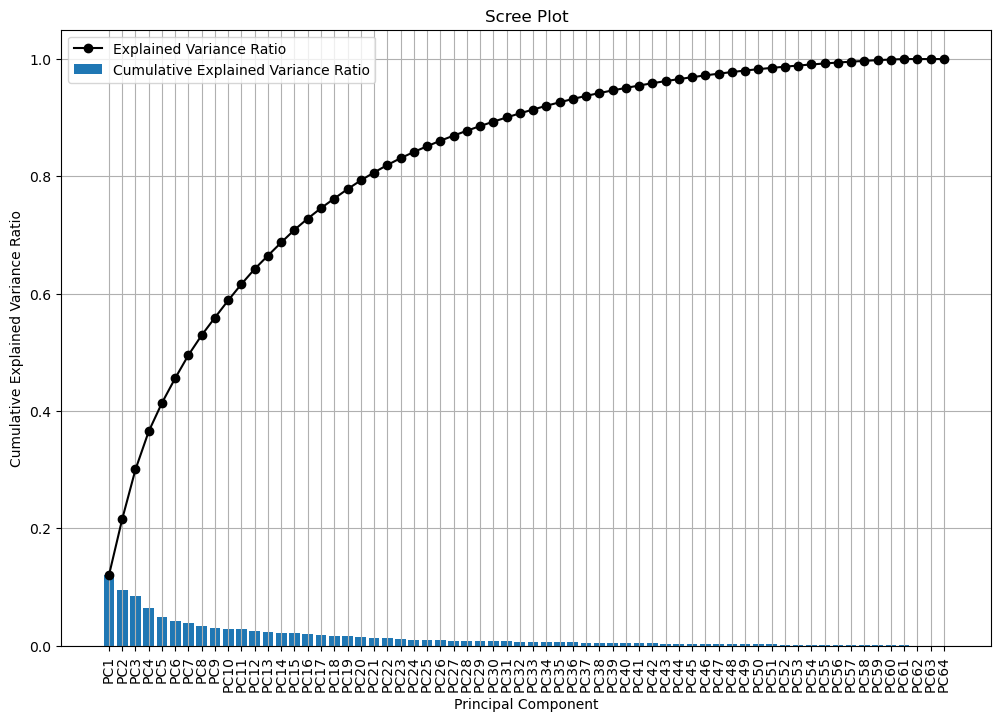

In [9]:
scree_plot(pca, df_loadings.columns)

In [10]:
# Count the number of components that explain 80% of the variance and print the result
# Calculate the number of components that explain 80% of the variance
components_80_var = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.8) + 1
print("Number of components explaining 80% of the variance:", components_80_var)

Number of components explaining 80% of the variance: 21


In [11]:
# Visualize the transformed data
def visualize_pca_2d(data, pca_model, label=None):
    # transform data with pca model (2 components)
    transformed_data = pca_model.transform(data)[:, :2]
    # create dataframe
    transformed_df = pd.DataFrame(transformed_data,
                                  columns=[f"PC{i+1}" for i in range(2)],
                                  index=label)
    # plot
    fig, ax = plt.subplots(figsize=(12, 8))
    if label is not None:
        ax.scatter(transformed_df['PC1'], transformed_df['PC2'],
                   c=label, cmap='tab10', alpha=0.7)
    else:
        ax.scatter(transformed_df['PC1'], transformed_df['PC2'])
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title('First Two Principal Components')

    return fig, ax

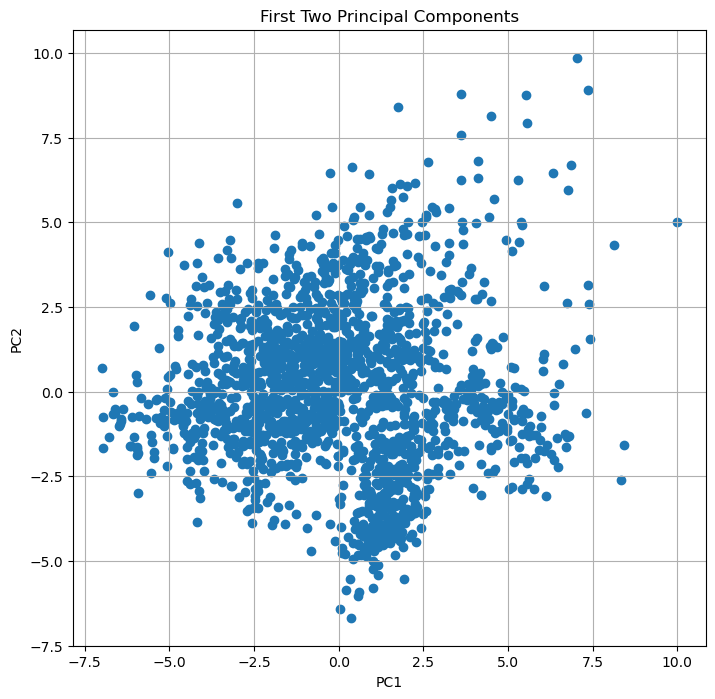

In [12]:
visualize_pca_2d(scaled_data, pca)
plt.show()

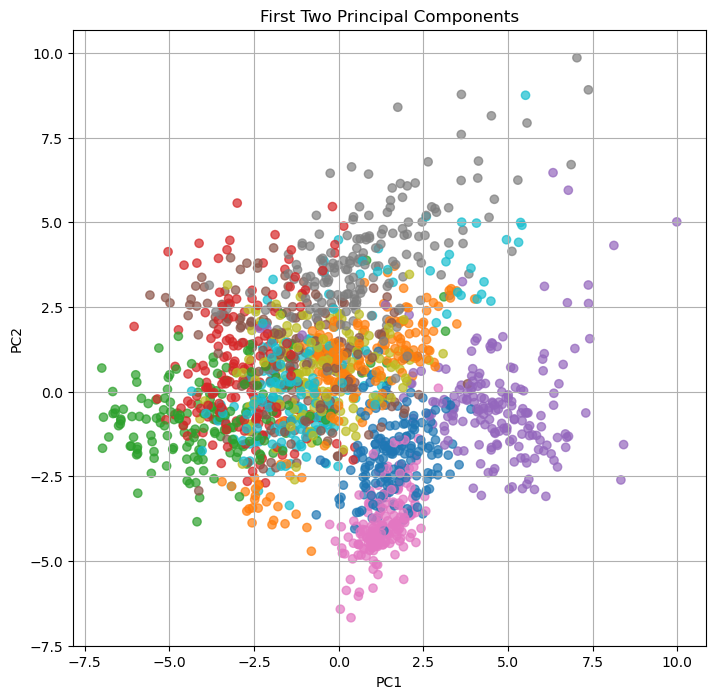

In [13]:
visualize_pca_2d(scaled_data, pca, label = digits.target)
plt.show()

In [14]:
# Write a function to plot 3D PCA
from mpl_toolkits.mplot3d import Axes3D

def visualize_pca_3d(data, pca_model, label=None):
    # transform data with pca model (3 components)
    transformed_data = pca_model.transform(data)[:, :3]
    # create dataframe
    transformed_df = pd.DataFrame(transformed_data,
                                  columns=[f"PC{i+1}" for i in range(3)],
                                  index=label)
    # plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    if label is not None:
        ax.scatter(
            transformed_df['PC1'],
            transformed_df['PC2'],
            transformed_df['PC3'],
            c=label, cmap='tab10', alpha=0.7
            )
    else:
        ax.scatter(
            transformed_df['PC1'],
            transformed_df['PC2'],
            transformed_df['PC3']
            )
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('First Three Principal Components')
    ax.set_box_aspect((1, 1, 1))
    ax.grid(True)
    
    return fig, ax
    

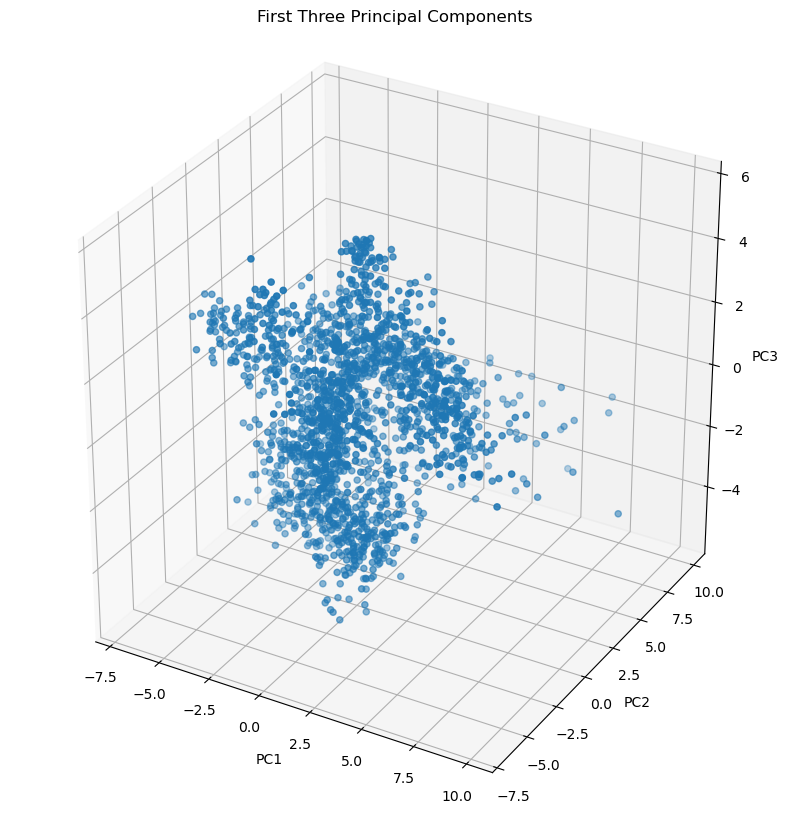

In [15]:
visualize_pca_3d(scaled_data, pca)
plt.show()

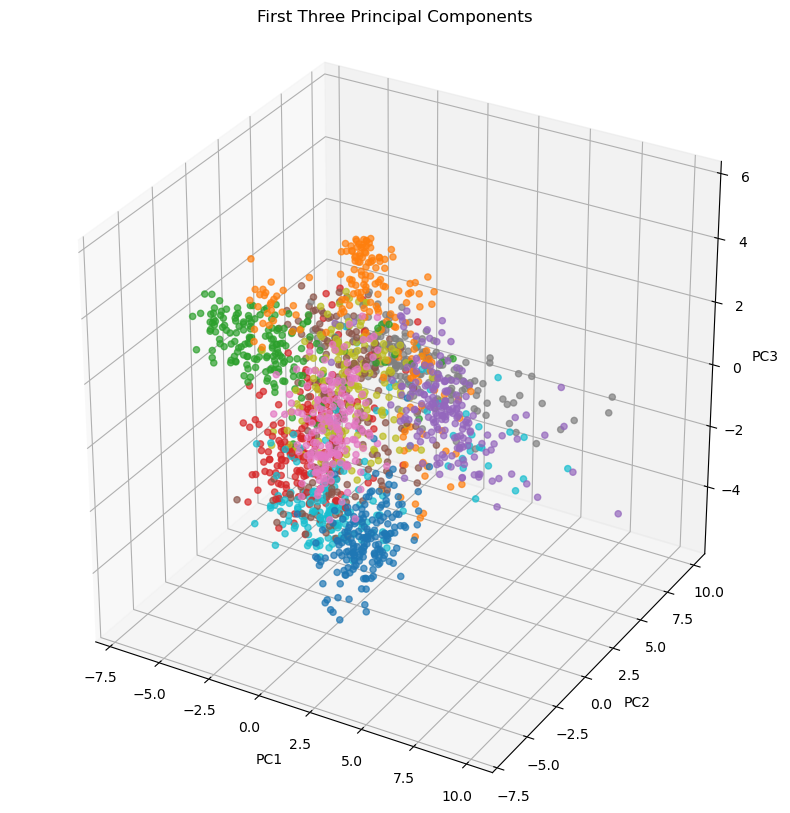

In [16]:
visualize_pca_3d(scaled_data, pca, label = digits.target)
plt.show()

In [17]:
# Visualize the 3D PCA using Plotly
def visualize_pca_3d_plotly(data, pca_model, label=None):
    # transform data with pca model (3 components)
    transformed_data = pca_model.transform(data)[:, :3]
    # create dataframe
    transformed_df = pd.DataFrame(transformed_data,
                                  columns=[f"PC{i+1}" for i in range(3)],
                                  index=label)
    # plot
    fig = px.scatter_3d(transformed_df, x='PC1', y='PC2', z='PC3',
                        color=label, width=1200, height=800,
                        color_continuous_scale=px.colors.qualitative.D3,
                        opacity=0.7)
    fig.update_layout(title='First Three Principal Components',
                      scene=dict(xaxis_title='PC1',
                                 yaxis_title='PC2',
                                 zaxis_title='PC3'))
    fig.show()
    return fig

In [18]:
visualize_pca_3d_plotly(scaled_data, pca, label=digits.target)
plt.show()

In [19]:
def visualize_scores_2d(data, pca_model, label=None):
    # transform data with pca model
    transformed_data = pca_model.transform(data)[:, :2]
    x_scale = 1 / (max(transformed_data[:, 0]) - min(transformed_data[:, 0]))
    y_scale = 1 / (max(transformed_data[:, 1]) - min(transformed_data[:, 1]))

    # create dataframe
    transformed_df = pd.DataFrame(transformed_data,
                                  columns=[f"PC{i+1}" for i in range(2)],
                                  index=label)

    # plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    if label is not None:
        ax.scatter(transformed_df['PC1'] * x_scale, transformed_df['PC2'] * y_scale,
                   c=label, cmap='tab10', alpha=0.7)
    else:
        ax.scatter(transformed_df['PC1'] * x_scale, transformed_df['PC2'] * y_scale)
    ax.set_aspect('equal')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2', rotation=90)
    ax.set_title('First Two Principal Components')
    ax.grid(True)
    
    return fig, ax

In [20]:
# Visualize biplot for PCA
def visualize_pca_biplot(data, pca_model, df_loadings, label=None):
    fig, ax = visualize_scores_2d(data, pca_model, label)
    # add biplot
    for i in list(df_loadings.index):
        ax.arrow(0, 0, df_loadings.loc[i, 'PC1'], df_loadings.loc[i, 'PC2'], color='r', alpha=0.5)
        ax.text(df_loadings.loc[i, 'PC1'], df_loadings.loc[i, 'PC2'], i, color='b')
    return fig, ax

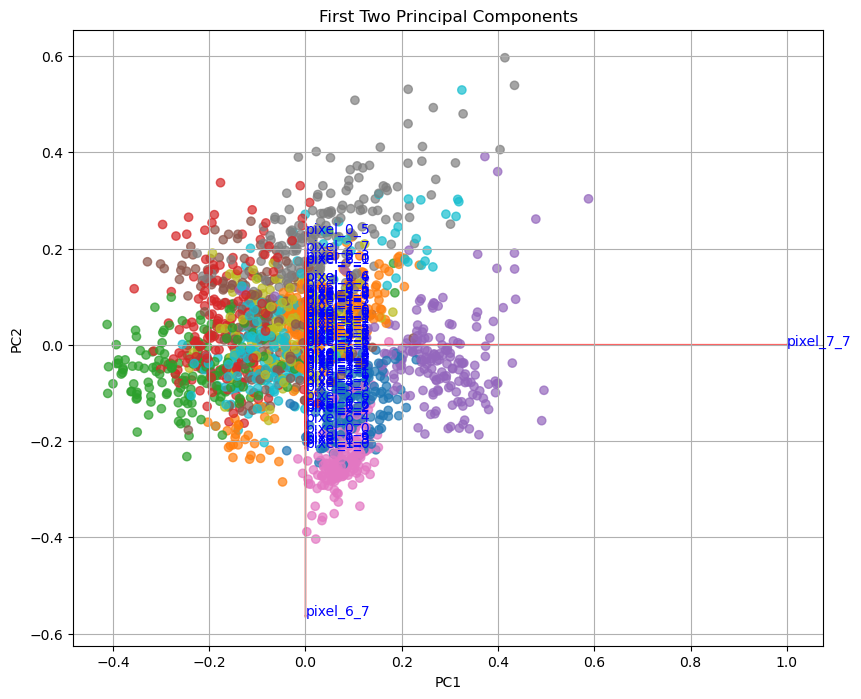

In [21]:
visualize_pca_biplot(scaled_data, pca, df_loadings, label=digits.target)
plt.show()

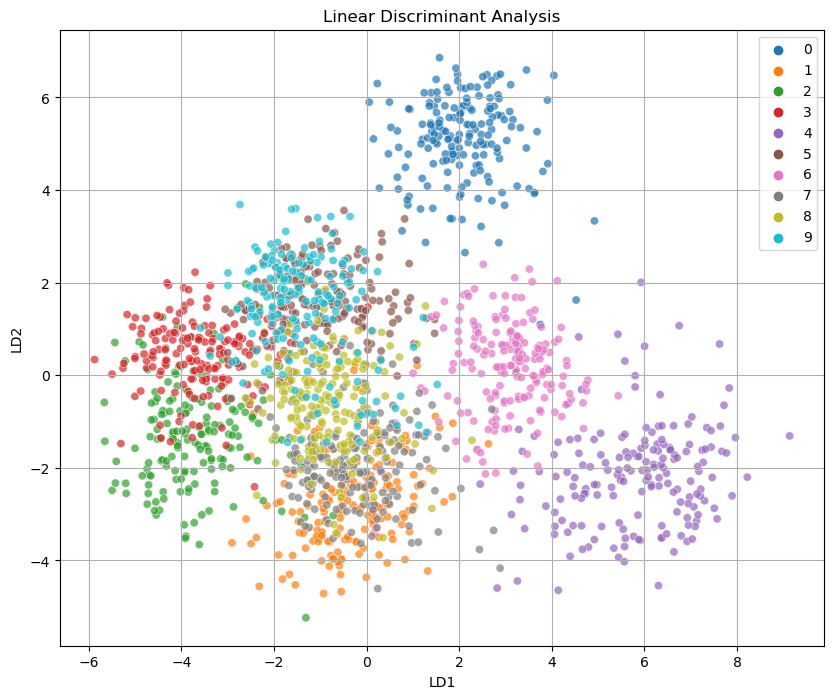

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
X = scaled_data
y = df.index

lda = LinearDiscriminantAnalysis(n_components=2)
data_plot = lda.fit(X, y).transform(X)

target_names = digits.target_names
data_plot = pd.DataFrame(data=data_plot, columns=['LD1', 'LD2'])
data_plot['labels'] = y
data_plot = data_plot.sort_values(by='labels')

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(data=data_plot, x='LD1', y='LD2', hue='labels', palette='tab10', alpha=0.7)
ax.set_aspect('equal')
ax.grid(True)
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_title('Linear Discriminant Analysis')
ax.legend()
plt.show()

# fig, ax = plt.subplots(figsize=(12, 8))
# ax.scatter(data_plot['LD1'], data_plot['LD2'], c=data_plot['labels'])
# ax.set_xlabel('LD1')
# ax.set_ylabel('LD2')
# ax.set_title('Linear Discriminant Analysis')

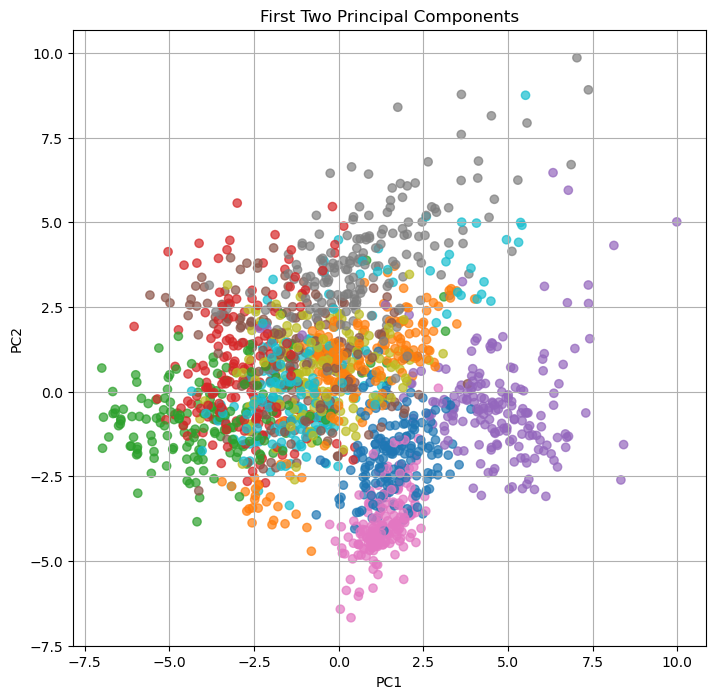

In [23]:
visualize_pca_2d(scaled_data, pca, df.index)
plt.show()

- In Linear Discriminant Analysis (LDA), the primary focus lies on maximizing the separation between classes while reducing the dimensionality of the dataset. This results in clusters that are distinctly separated, leading to less overlap or intermixing between points compared to Principal Component Analysis (PCA). Unlike PCA, which primarily focuses on capturing the overall variance in the data without considering class labels, LDA explicitly considers class information, resulting in more distinct class boundaries and less mixing of points within classes.

# 2/ Latent Dirichlet Allocation (LDA) and Topic Modeling

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# import re
import re
# import string
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# import gensim
import gensim
# import wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\butte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\butte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\butte\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\butte\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
df2 = pd.read_csv("data/abcnews-date-text.csv", parse_dates=["publish_date"], infer_datetime_format=True)
df2.head()

C:\Users\butte\AppData\Local\Temp\ipykernel_34420\4075191229.py:1: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [26]:
def clean_text(headline, stemming = False, lemmatization = False):
    # remove punctuation
    le = WordNetLemmatizer()
    ps = PorterStemmer()
    
    # tokenization
    tokens = word_tokenize(headline)

    # remove stopwords and pick words with more than 2 characters
    tokens = [t for t in tokens if t not in stopwords.words('english') and len(t) > 2]

    # stemming
    if stemming:
        tokens = [ps.stem(t) for t in tokens]

    # lemmatization
    if lemmatization:
        tokens = [le.lemmatize(t) for t in tokens]

    # back to string from list
    tokens = ' '.join(tokens)

    return tokens

In [27]:
# Drop first column, choose first 100000 rows and apply clean_text function to the headline_text column
df2 = df2.drop(['publish_date'], axis=1)
# df2 = df2[:100000]
df2 = df2.head(100000)
df2['headline_clean_stem'] = df2['headline_text'].apply(clean_text, stemming=True, lemmatization=False)
df2.head()

,headline_text,headline_clean_stem
0,aba decides against community broadcasting lic...,aba decid commun broadcast licenc
1,act fire witnesses must be aware of defamation,act fire wit must awar defam
2,a g calls for infrastructure protection summit,call infrastructur protect summit
3,air nz staff in aust strike for pay rise,air staff aust strike pay rise
4,air nz strike to affect australian travellers,air strike affect australian travel


In [28]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Fit and transform the headline_text column
count_matrix = count_vectorizer.fit_transform(df2['headline_clean_stem'])
count_matrix.shape

(100000, 5000)

In [29]:
print(count_matrix)

  (0, 40)	1
  (0, 1170)	1
  (0, 944)	1
  (0, 603)	1
  (0, 2547)	1
  (1, 75)	1
  (1, 4920)	1
  (1, 335)	1
  (1, 1179)	1
  (2, 2228)	1
  (2, 3396)	1
  (2, 4310)	1
  (3, 134)	1
  (3, 4192)	1
  (3, 318)	1
  (3, 4263)	1
  (3, 3158)	1
  (3, 3699)	1
  (4, 134)	1
  (4, 4263)	1
  (4, 109)	1
  (4, 320)	1
  (4, 4584)	1
  (5, 4904)	1
  (5, 4606)	1
  :	:
  (99993, 530)	1
  (99994, 3236)	1
  (99994, 2220)	1
  (99994, 3840)	1
  (99994, 3444)	1
  (99995, 2275)	1
  (99995, 4552)	1
  (99995, 1737)	1
  (99995, 3654)	1
  (99996, 3906)	1
  (99996, 535)	1
  (99996, 4510)	1
  (99997, 1582)	1
  (99997, 2557)	1
  (99997, 3316)	1
  (99998, 896)	1
  (99998, 1160)	1
  (99998, 3136)	1
  (99998, 682)	1
  (99998, 3894)	1
  (99999, 974)	1
  (99999, 711)	1
  (99999, 2007)	1
  (99999, 4602)	1
  (99999, 3933)	1


In [30]:
print(count_vectorizer.get_feature_names_out()[:100])

['000' '100' '1000' '10000' '100000' '100m' '10m' '150' '15m' '200' '2000'
 '20000' '200000' '2003' '2004' '2005' '2006' '2007' '200m' '2010' '2012'
 '20m' '250' '25m' '300' '3000' '30000' '30m' '36er' '400' '400m' '40m'
 '4wd' '500' '5000' '50000' '50m' '600' '911' 'ab' 'aba' 'abalon'
 'abandon' 'abar' 'abattoir' 'abba' 'abbott' 'abc' 'abduct' 'abolish'
 'aborigin' 'abort' 'absenc' 'abu' 'abus' 'aca' 'academ' 'academi' 'acb'
 'accc' 'accept' 'access' 'accid' 'accident' 'accommod' 'account' 'accus'
 'ace' 'aceh' 'acf' 'achiev' 'acid' 'acknowledg' 'acoss' 'acquit' 'act'
 'action' 'activ' 'activist' 'actor' 'actress' 'actu' 'ad' 'adam' 'add'
 'addict' 'address' 'adelaid' 'adequ' 'adf' 'adi' 'adjourn' 'administr'
 'admir' 'admiss' 'admit' 'adopt' 'adult' 'advanc' 'advantag']


In [31]:
df2['headline_clean_stem'][:5]

0      aba decid commun broadcast licenc
1           act fire wit must awar defam
2      call infrastructur protect summit
3         air staff aust strike pay rise
4    air strike affect australian travel
Name: headline_clean_stem, dtype: object

In [32]:
# Check to see if every word in the first row appears in the vocabulary of the count vectorizer
first_row_words = df2['headline_clean_stem'][0].split()
all_words_in_vocabulary = all(word in count_vectorizer.get_feature_names_out() for word in first_row_words)
print(all_words_in_vocabulary)

True


In [33]:
# Create a Latent Dirichlet Allocation object
lda = LatentDirichletAllocation(n_components=10, max_iter=5, random_state=42)

# Fit the LDA model
lda.fit(count_matrix)
lda_topics = lda.transform(count_matrix)

# Get the topics
topics = lda.components_

# Get the vocabulary
vocabulary = count_vectorizer.get_feature_names_out()

# Get the perplexity
perplexity = lda.perplexity(count_matrix)
print(f"Perplexity: {perplexity:.2f}")

# Get the log-likelihood
log_likelihood = lda.score(count_matrix)
print(f"Log-likelihood: {log_likelihood:.2f}")

# # Get the coherence score
# coherence = gensim.models.CoherenceModel(model=lda, texts=df2['headline_clean_stem'], dictionary=count_vectorizer, coherence='c_v').get_coherence()
# print(f"Coherence Score: {coherence:.2f}")

Perplexity: 2692.19
Log-likelihood: -3556361.50


In [34]:
# Show top 10 words for each topic
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}:")
    print([vocabulary[word] for word in topic.argsort()[-10:]])
    print()

Topic 1:
['health', 'group', 'pakistan', 'air', 'consid', 'test', 'concern', 'plan', 'set', 'new']

Topic 2:
['drug', 'hear', 'arrest', 'trial', 'murder', 'polic', 'face', 'court', 'man', 'charg']

Topic 3:
['deni', 'coach', 'final', 'restrict', 'play', 'water', 'world', 'win', 'cup', 'say']

Topic 4:
['death', 'toll', 'resid', 'market', 'look', 'road', 'pay', 'hit', 'strike', 'rise']

Topic 5:
['park', 'plan', 'jail', 'dead', 'melbourn', 'new', 'appeal', 'high', 'anti', 'ban']

Topic 6:
['shoot', 'open', 'trade', 'man', 'titl', 'search', 'polic', 'sydney', 'forc', 'miss']

Topic 7:
['servic', 'nsw', 'industri', 'council', 'hospit', 'boost', 'urg', 'plan', 'fund', 'govt']

Topic 8:
['south', 'win', 'attack', 'car', 'investig', 'claim', 'crash', 'probe', 'kill', 'polic']

Topic 9:
['mayor', 'alp', 'poll', 'stay', 'day', 'drought', 'new', 'elect', 'time', 'council']

Topic 10:
['target', 'vic', 'troop', 'protest', 'worker', 'bank', 'rain', 'bush', 'iraq', 'warn']



### Interpreting the LDA Topics: based on the top 10 words in each topic, here are some possible interpretations:

Topic 1: Public health concerns and initiatives in Pakistan, possibly related to air quality testing and new plans.

Topic 2: Crime and legal matters, focusing on drugs, arrests, trials, and murder charges.

Topic 3: Sports, specifically related to a final game, restrictions, players, and potential victory.

Topic 4: Accidents and their consequences, mentioning fatalities, tolls, and potential causes like road conditions and strikes.

Topic 5: Controversial issues in Melbourne, possibly involving a park, jail, death penalty, and potential appeals or bans.

Topic 6: Police activity and operations, including shootings, trade, searches, and missing persons.

Topic 7: Government services and infrastructure, focusing on healthcare, industry, funding, and urgent plans.

Topic 8: Traffic accidents and investigations, mentioning fatalities, car crashes, and police involvement.

Topic 9: Politics and elections, specifically involving mayors, polls, droughts, and new council members.

Topic 10: Military and security concerns, mentioning targets, protests, troops, and potential threats.

In [35]:
# Define a function to check the headline topic
def check_headline_topic(lda_model, headline, count_vectorizer):
    headline_vector = count_vectorizer.transform([headline])
    topic_distribution = lda_model.transform(headline_vector)
    
    # Sort topics by probability in descending order
    sorted_topics = sorted(enumerate(topic_distribution[0]), key=lambda x: x[1], reverse=True)
    
    print("The headline may belong to the following topics:")
    for topic, prob in sorted_topics:
        print(f"Topic {topic + 1}: Probability {prob:.2f}")

In [36]:
# show the first row of the df2
df2[:1]

,headline_text,headline_clean_stem
0,aba decides against community broadcasting lic...,aba decid commun broadcast licenc


In [37]:
# Apply the function to the headlines
check_headline_topic(lda, df2['headline_clean_stem'][0], count_vectorizer)

The headline may belong to the following topics:
Topic 10: Probability 0.58
Topic 9: Probability 0.29
Topic 1: Probability 0.02
Topic 8: Probability 0.02
Topic 3: Probability 0.02
Topic 7: Probability 0.02
Topic 4: Probability 0.02
Topic 2: Probability 0.02
Topic 5: Probability 0.02
Topic 6: Probability 0.02


In [38]:
# Check the shape of lda_topics
lda_topics.shape

(100000, 10)

In [39]:
# Check the first row of lda_topics
lda_topics[0]

array([0.01667772, 0.01666842, 0.01667052, 0.01666943, 0.01666667,
       0.01666667, 0.01666945, 0.01667708, 0.29134867, 0.57528535])

In [40]:
# Define a function to show the topic percentage
def show_topic_percentage(index):
    print(f'Doc {index}')
    for topic, percentage in enumerate(lda_topics[index]):
        print(f'\tTopic {topic + 1}: {(percentage * 100):.2f}%')

In [41]:
# Apply the function to the first row of lda_topics
show_topic_percentage(0)

Doc 0
	Topic 1: 1.67%
	Topic 2: 1.67%
	Topic 3: 1.67%
	Topic 4: 1.67%
	Topic 5: 1.67%
	Topic 6: 1.67%
	Topic 7: 1.67%
	Topic 8: 1.67%
	Topic 9: 29.13%
	Topic 10: 57.53%


In [42]:
# Define a function to plot word cloud for each topic
def plot_wordcloud(topic_idx, num_words=50):
    # Get the top words for the topic
    top_words = [vocabulary[word] for word in topics[topic_idx].argsort()[-num_words:]]

    # Create the word cloud
    wordcloud = WordCloud(width=1000, height=600, background_color='black').generate(' '.join(top_words))

    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx + 1}')
    plt.show()

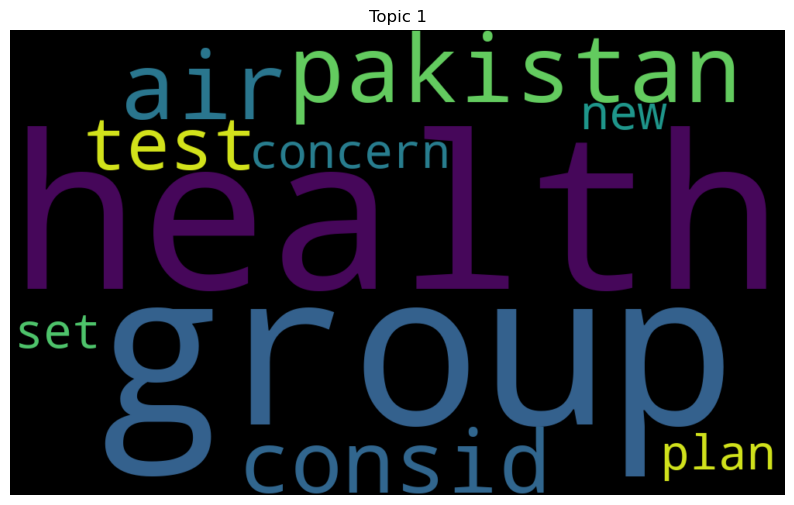

In [43]:
# Top 10 words for first topic
plot_wordcloud(0, num_words=10)

In [44]:
# Show an array of top 10 words for first topic
top_words_first_topic = [vocabulary[word] for word in topics[0].argsort()[-10:]]
print(top_words_first_topic)

['health', 'group', 'pakistan', 'air', 'consid', 'test', 'concern', 'plan', 'set', 'new']


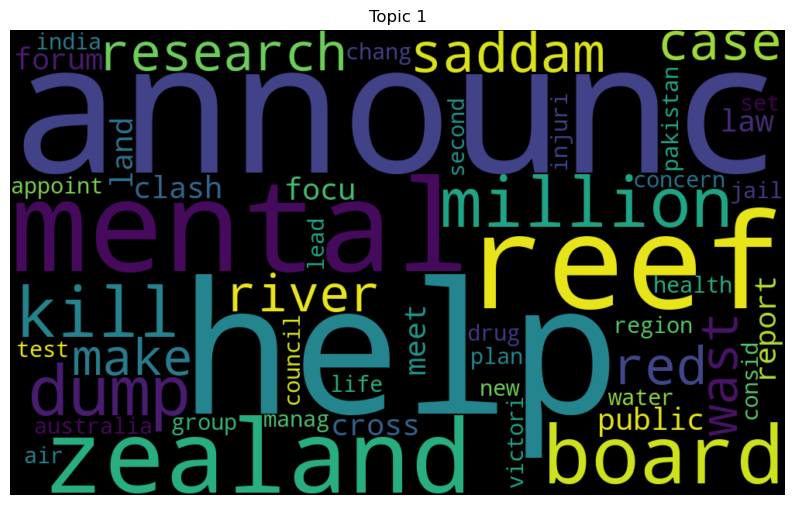

In [45]:
# Top 50 words for first topic
plot_wordcloud(0)

In [46]:
import pyLDAvis
import pyLDAvis.lda_model

# Define the LDAvis data
vis_data = pyLDAvis.lda_model.prepare(lda, count_matrix, count_vectorizer, mds='tsne')
pyLDAvis.display(vis_data)